# Galaxies and the large-scale structure of the Universe

_A python exercise notebook written by Rita Tojeiro, October 2017, for the Lab component of the AS1001 Cosmology module at the University of St Andrews, UK.  It was modified to stand alone in an SDSS EPO workshop at AAS in Jan 2018 and then significantly modified to emphasize developing programming skills by Andrea Lommen, Haverford College, January 2018. 
This notebook has benefited from examples provided by Britt Lundgren (University of North Carolina) and Jordan Raddick (John Hopkins University)_.

In this Notebook, you will use data from the Sloan Digital Sky Survey (SDSS), to explore the relationship between galaxy properties and the large-scale structure of the Universe. 

In the end, you should have found an answer to the following question:

- How are galaxies spatially distributed in the Universe?
- How does redshift relate to distance?

The programming skills you should have mastered include:

- Add if statements, Boolean operators, arithmetic operations, and mean/min as necessary.
- Use of np.where, because you’ll need that in the 3rd lab
- Writing variables into strings

The programming skills you will have used (but maybe not mastered) include:

- Doing a SQL query to read in data. (in Lab 2 you won't quite master this, but you'll use it. In lab 3 you'll get more practice.)


## SDSS

You will answer the above questions yourself, by exploring the largest astronomical dataset in the world - the Sloan Digital Sky Survey (www.sdss.org).


# What we need to do in class for you to do this workbook
In order of appearance in the notebook:
* The Sloan Digital Sky Survey and SQL queries (brief intro)
* The Celestial coordinate system
* matplotlib.pyplot(just a brief intro - you'll get used to it using this lab) 
* Doppler shift, redshift, Hubble's constant, Mpc and Mly as a distance, np.where

### Imports

First, we will import the necessary SciServer and support libraries. 

In [1]:
# Import Python libraries to work with SciServer
import SciServer.CasJobs as CasJobs # query with CasJobs
import SciServer.SciDrive as SciDrive   # read/write to/from SciDrive
# import SciServer.SkyServer as SkyServer   # show individual objects and generate 
    # thumbnail images through SkyServer
print('SciServer libraries imported')

# Import other libraries for use in this notebook.
import numpy as np                  # standard Python lib for math ops
from scipy.misc import imsave       # save images as files
import pandas                       # data manipulation package
import matplotlib.pyplot as plt     # another graphing package
import os                           # manage local files in your Compute containers
print('Supporting libraries imported')

import astroML
from astroML.datasets import fetch_sdss_spectrum
from astropy.io import ascii

# Apply some special settings to the imported libraries
# ensure columns get written completely in notebook
pandas.set_option('display.max_colwidth', -1)
# do *not* show python warnings 
import warnings
warnings.filterwarnings('ignore')
print('Settings applied')

SciServer libraries imported
Supporting libraries imported
Settings applied


## Querying the SDSS database

The SDSS data is stored in a SQL database. SQL is a languased used to communicate with databases via "queries". For each query command, the database returns an answer. Usually, this is a subsample of the original database, though SQL can operate on the data very effectively too. In this tutorial we will submit queries to the SDSS database to gather the information that we need, and we will use python to operate on, manipulate, and vizualise that data.

An extensive tutorial on how to query the SDSS database is provided here: http://skyserver.sdss.org/dr14/en/help/howto/search/searchhowtohome.aspx . In short, every SQL command consists of three blocks: 
- The **SELECT** block: it defines the quantities that you want your query to return.
- The **FROM** block: it defines which tables of the database you want SQL to look in.
- The **WHERE** block: it defines any constraints on the data that you want to impose.


### Using SQL and SciServer to return galaxy data

For the database schema and documentation see http://skyserver.sdss.org/dr14/en/help/browser/browser.aspx The following query returns specific information on a sample of galaxies, as a dataframe.


This query finds the RA (right ascension) of all galaxies g-band magnitude brighter than 17 (Magnitudes are a crazy brightness system seemingly designed to thwart young astronomy students.  Don't get intimidated. It's kind of a dumb system, but don't tell anyone I said that. You need to know that the smaller the magnitude the brighter the object. A magnitude of 6 is visible to the naked eye.) We will talk about magnitudes, bands (e.g. g-band), right ascension and declination, in class.

# HOW TO DO THIS LAB
There are 29 cells for you to complete and run.  Each one is numbered.  You should also run cells like the one below that contain code, but haven't been run yet. You should read and run everything.

In [2]:
# Find objects in the Sloan Digital Sky Survey's Data Release 14.
## 
# First, store the query in an object called "query"
# This query gets right ascension (ra) from a catalog called SpecPhotoAll (Spectrographic
# and Photometric information) and limits the query to just objects deemed to be galaxies
# with a redshift in between .02 and .5 and with a g-magnitude brighter than 17.
query="""
SELECT ra
FROM SpecPhotoAll
WHERE class = 'galaxy' AND z BETWEEN .02 and .5 AND modelMag_g < 17
"""
#Then, query the database. The answer is a table that is being returned to a 
# dataframe that we've named right_ascension.
right_ascension = CasJobs.executeQuery(query, "dr14")
right_ascension = (np.array(right_ascension))[:,0]   #We'll learn more about why you need 
# this statement later. For now
# I'll just tell you we're converting it from a table into an array.
#DR14 means "Data Release 14" See http://skyserver.sdss.org/dr14

print("SQL query finished.")
print("SQL query returned " + str(len(right_ascension))+ " galaxies")

SQL query finished.
SQL query returned 100724 galaxies


Let's see what the first 10 elements of right_ascension look like.

In [3]:
right_ascension[0:10]#returning the first 10 array elements

array([146.71421, 146.71421, 147.32951, 147.32951, 146.51283, 146.51283,
       146.8833 , 146.8833 , 146.09369, 146.09369])

What is right ascension? Write down your definition from class or look it up, but you must put in your words and also explain how you think about it.

 #(1) 
* *Right ascension, also written as **ra/RA**, is a space **coordinate** which aids in the location of an object, for example a star, in the sky. In comparisson to declination(Dec), another celestial coordinate, RA and Dec corresponds to **longitude** and latitude respectively.*

3 points possible for the above:
* 3 points: if your explanation actually would help someone understand what Right Ascension was if they had never heard of it before.
* 2 points: if your explanation doesn't have anything wrong in it, but if your reader didn't already know what it was, they still wouldn't know.
* 1 point: If your explanation has some wrong stuff in it, but at least you wrote something.
* 0 points: if this question is blank.

On a scale of 1-10, how useful was printing out the first 10 elements? What would you actually like to know about this 100,724 galaxies you just read in? (Your answer to those two questions below. You get a point for putting effort into thinking about this, but there's no right answer. I just want you to think about how you would know if your query went well or not.)

#(2) 
* *If you print the whole right_ascension array, all the ra elements from spechPhotoAll won't be displayed. Therefore printing in a scale of 1-10 shows all the first 10 ra elements including those invisible first 10 elements when printing the whole array. 100,724 is the size, or length, of the right_ascension array. If there is no error with the query, a called statement, or variable, will be **printed below the cell**. A**SyntaxError** will be desplayed below the cell if the query has an error. The first 10 elements must also be within the minimum and maximum element.*

2 points possible for the above:
* 2 points: if you gave this some thought.
* 1 point: if you wrote something down.
* 0 points: if this question is blank.

What else could you do that would help you know whether the reading in of those galaxies went well? (Put your answer below BEFORE you look below and BEFORE you go on.)

#(3) 
* *With the g-band magnitude being < 17, print the maximum and minumum element of the right_ascension array. The values obtained should be between 0 and 360 degrees. If the values are not within this range, then the reading of those galaxies didn't go well. Besides, you can add a new cell below, replace ra with redshift(z) assign a variable to the redshift (z), say redshiftz, and if you call the redshiftz array, redshift elements between **0.02 and 0.5** will be printed. Both of this can confirm that reading of the query went well*.

2 points possible for above:
* 2 points: if you gave this some thought.
* 1 point: if you wrote something down.
* 0 points: if this question is blank.

Since it's right ascension, we'd expect the minimum to be 0 and the maximum to be 360 degrees (right ascension is like longitude.) Print out the min and max below.

In [4]:
#(4)
#(1 point each for max and min. ) 
print(min(right_ascension))  #printing the minimum element of the righ_ascension array
print(max(right_ascension)) #printing the maximum element of the righ_ascension array

0.0087588679
359.99503


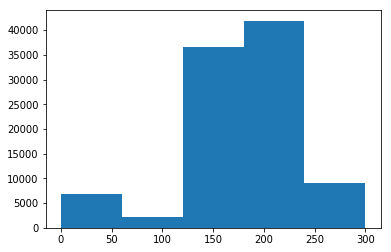

In [5]:
"""  Let's go a little farther and actually make a histogram of our array. What
do we expect this to look like? I'd be a little surprised if there were more galaxies
at particular right ascensions compared to others. Aren't galaxies distributed equally
across the universe?"""
plt.hist(right_ascension, bins=range(0,360,60));  #The semi-colon there keeps it from printing
    # the array it's going to plot. Take the semi-colon away and look at it!
    #removing the semicolons will print the right_ascension array above the histogram

(array([ 6888.,  2140., 36648., 41906.,  9121.]),
 array([  0,  60, 120, 180, 240, 300]),
 <a list of 5 Patch objects>)

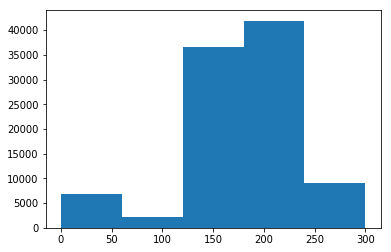

In [6]:
"""  Let's go a little farther and actually make a histogram of our array. What
do we expect this to look like? I'd be a little surprised if there were more galaxies
at particular right ascensions compared to others. Aren't galaxies distributed equally
across the universe?"""
plt.hist(right_ascension, bins=range(0,360,60))  #The semi-colon there keeps it from printing
    # the array it's going to plot. Take the semi-colon away and look at it!
     #removing the semicolons will print the right_ascension array above the histogram

Ah look at that!  That's really not what I was expecting. I was expecting an even distribution of right ascensions from 0 to 360. We'll get to that in a little bit.  For now, notice how useful this was to use plots
to find out about your data (especially when it's more than 100,000 galaxies.)

### Your turn!  Now get an array of the declinations instead of the right ascension. The keyword is "dec".


#(5)
(3 points possible:
3 points for getting a numpy array of declinations)

And again in your own words, say what declination is.

In [7]:
# Find objects in the Sloan Digital Sky Survey's Data Release 14.
## 
# First, store the query in an object called "query"
# This query gets declination(dec) from a catalog called SpecPhotoAll (Spectrographic
# and Photometric information) and limits the query to just objects deemed to be galaxies
# with a redshift in between .02 and .5 and with a g-magnitude brighter than 17.
query="""
SELECT dec
FROM SpecPhotoAll
WHERE class = 'galaxy' AND z BETWEEN .02 and .5 AND modelMag_g < 17
"""
#Then, query the database. The answer is a table that is being returned to a 
# dataframe that we've named declination.
declination = CasJobs.executeQuery(query, "dr14")
declination = (np.array(declination))[:,0]   #We'll learn more about why you need 
# this statement later. For now
# I'll just tell you we're converting it from a table into an array.
#DR14 means "Data Release 14" See http://skyserver.sdss.org/dr14

print("SQL query finished.")
print("SQL query returned " + str(len(declination))+ " galaxies")

SQL query finished.
SQL query returned 100724 galaxies


In [8]:
declination #returning the declination array

array([-1.0413043e+00, -1.0413043e+00,  2.8902695e-02, ...,
        3.5398556e+01,  2.6254859e+01,  2.8882720e+00])

(#6)
* *Declination(Dec), is a space **coordinate** which aids in the location of an object, for example a star, in the sky. In comparisson to right ascension(RA/ra), another celestial coordinate, Dec corresponds to latitude while RA corresponds to longitude.*

3 points possible for above:
* 3 points: if your explanation actually would help you understand what declination was if you had never heard of it before.
* 2 points: if your explanation doesn't have anything wrong in it, but if you didn't already know what it was, you still wouldn't know.
* 1 point: If your explanation has some wrong stuff in it, but at least they wrote something.
* 0 points: if this question is blank.

Use the three techniques we used above to get a sense of whether your query worked and what your data looks like. 

First look at the first 10 elements of the array.

In [9]:
#(7)
# 1 point possible, you either got it or you didn't.  Make sure you get 10 elements, and not 9 or 11.
declination[0:10] #returning the first 10 elements of the declination array.

array([-1.0413043 , -1.0413043 ,  0.02890269,  0.02890269, -0.84576492,
       -0.84576492, -0.49469887, -0.49469887, -0.79308773, -0.79308773])

In [10]:
declination #returning the declination array

array([-1.0413043e+00, -1.0413043e+00,  2.8902695e-02, ...,
        3.5398556e+01,  2.6254859e+01,  2.8882720e+00])

In [11]:
declination[0:20] #returning the first 20 elements in the scale if 0-20

array([-1.0413043 , -1.0413043 ,  0.02890269,  0.02890269, -0.84576492,
       -0.84576492, -0.49469887, -0.49469887, -0.79308773, -0.79308773,
       -0.40839151, -0.40839151, -1.0976161 , -1.0976161 , -0.60874859,
       -0.60874859, -0.12001413, -0.09284351, -0.12001413,  0.03547963])

Comment on what you learned from looking at those 10 elements.

#(8)
3 points possible: 
1 point for each thoughtful thing you learned. 

1. *This prints elements from positions **0 to 9** within declination array. Some values are negative while others are positive hence the minimum and maximum element of the declination array will be negative and positive respectively.*
2. *For the first 10 elements, every two consecutive elements within the declination array are the same, for example elements at position 0 and 1, 2 and 3. This is shown practically in the cell below.*
3. *The elements distance increases from positions 1 to 2 and 5 to 6(shown practically in cell below). Also the elements distance decreases from positions 3 to 4 and 7 to 8(shown practically in the cell below).*



In [12]:
print(declination[0]==declination[1])#printing that element at position 0 and 1 are equal.
print(declination[2]==declination[3])#printing that element at position 2 and 3 are equal.
print(declination[1]<declination[2])#printing that element at position 2 is greater than that at 1.
print(declination[5]<declination[6])#printing that element at position 6 is greater than that at 5.
print(declination[3]<declination[4])#printing that element at position 4 is less than that at 3.
print(declination[7]<declination[8])#printing that element at position 8 is less than that at 7.

True
True
True
True
False
False


Next print the min and max of the array.

In [13]:
#(9)
#(2 points possible, one for each the max and min.)
print(min(declination)) #printing the minimum element of the declination array.
print(max(declination)) #printing the max element of the declination array.

-11.238405
70.133229


What did you learn from the max and min?  Is it what you were expecting?  How can you explain it? (Take a guess.)

#(10)
(2 points for a thoughtful guess.
1 point for writing something.
0 points for not answering.)

* *Yes, this's what I was expecting. After printing the first 10 dec array elements, I expected the maximum element to be a **positive** number and the minimun element to be a **negative** number which are all true(70.133229 and -11.2384050 respectivelly). This shows that elements within the declination array range from -11.238405 to 70.133229.*

Now plot the histogram.

Text(0,0.5,'number of galaxies')

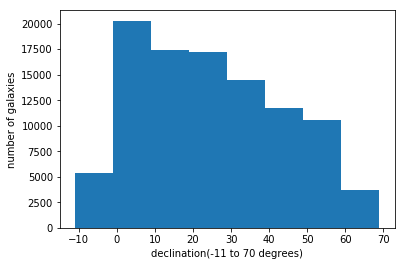

In [14]:
#(11)
plt.hist(declination, bins=range(-11, 70, 10)); #ploting the histogram curve which bins ranges from -10 to 70 skiping 10 numbers sconsequently.
                                                #the semi-colon keeps it from printing the array it's going to plot
plt.xlabel("declination(-11 to 70 degrees)") #labeling the x-axis
plt.ylabel("number of galaxies") #labeling the y-axis

4 points total for above:
* 1 point for making any kind of histogram (even if it's the wrong one)
* 1 point for a histogram of declination even if it has bad bins (too small or too large for you to see the important features)
* 1 point for a histogram with good sense of binning
* 1 point for labeling the histogram

What did you learn from the histogram?  Is it what you were expecting? Are there any features that surprise you? How can you explain what you see?  (Take a guess.)

#(12) (1 point for thoughtful answer)

* *No, I expected to see an  **even distribution** of galaxies from -11 to 70 but this did not happen. More galaxies are distributed within the range 0-60 and less distributed in the range -11- 0 and 60-70. Also, I learnt that using the semi-colon keep it from printing the array it's going to plot.*  

Why is there nothing below -10 degrees or above 70 degrees?  _Hint: http://www.sdss.org/dr14/scope/ _

#(13)
(1 point for anything with thought in it, even if it's wrong.)

* *This is because the number of galaxies ranges between declinations -10 degrees(value around minimum) and 70 degrees(value around maximum)*.

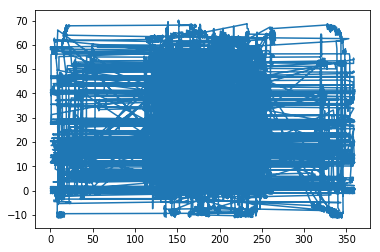

In [15]:
#Now let's plot the right_ascension and declination on the same plot!
plt.plot(right_ascension, declination)

In [16]:
# That is not a very useful plot because it connected all the points together. 
# (Sometimes that's what you want, but not here.)

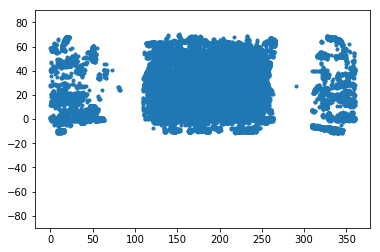

In [17]:
plt.ylim(-90,90)          # I want to force it to show me all declinations from -90 to 90
plt.plot(right_ascension, declination, ".") # Using a period as a marker.

Your turn!   See here https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html and experiment with some other shapes and colors. Just show one of the plots you experimented with below. Also get the plot to show just the range from 120 to 250 in RA and from 10 to 60 in declination.

Text(0,0.5,'declination')

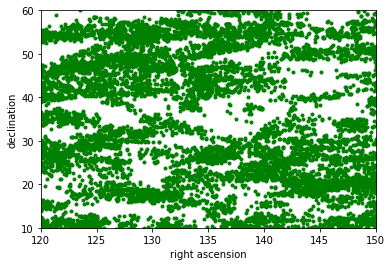

In [18]:
#(14)
# 3 points total:
#    1 point for different shape than above
#    1 point for different color than above
#    1 point for just the range from 120-250 in RA and 10 to 60 in declination
plt.plot(right_ascension, declination, "g.") #ploting, using green dots, both right_ascension and declination in the x-axis and y-axis respectively
plt.xlim(120, 150) #limiting the x-axis values in the range 120 to 150.
plt.ylim(10, 60)#limiting the y-axis values in the range 10 to 60.
plt.xlabel("right ascension")#labeling the x-axis
plt.ylabel("declination")#labeling the y-axis

What do you notice about the distribution of galaxies across the sky?

#(15) 
(2 points total: 1 point for an answer, 1 point for a thoughtful answer)

* *Galaxies appear to be more evenly distributed from 120 to 150 degrees(in RA) and 10 to 60 degrees (in declinations) compared to from 0 to 360 degrees(in RA)and -10 to 70 degrees (in declinations)*

### Now that you're used to getting these statistics, write a function that does all this for any variable you want...
Write a *show_stats* function that takes two inputs, the name of the variable you want from the SDSS database, and the limiting value of the g magnitude, prints the first 10 elements, finds the min, max, and mean, plots a histogram, and returns an array containing that column. Make it so that the printed output explains what you're seeing, i.e. "the max and min are....blah blah."

One subtlety here is that the "query" statement that you've been creating is a string, so it's slightly tricky to write the name of the variable you want to it.  As with everything in Python there are multiple ways to do this.  I did it this way (this is the beginning of my function definition.)

```ruby
def show_stats(varname, glimit):
    query="""   
    SELECT {}
    FROM SpecPhotoAll
    WHERE class = 'galaxy' AND z BETWEEN .02 and .5 AND modelMag_g < {}
    """.format(varname, glimit)
```
    
The { }'s in the query tell Python where to put _varname_ and _glimit_ into the string. _I'll give you a hint about how I figured this out. I experimented with the query statement all by itself in a cell.  My practice cell looked like this:_ 

```ruby
varname = 'ra'
glimit = 10
query="""   
SELECT {}
FROM SpecPhotoAll
WHERE class = 'galaxy' AND z BETWEEN .02 and .5 AND modelMag_g < {}
""".format(varname, glimit)

print (query)
```
I encourage you to practice like this a little bit until you get the hang of how this works. Move the { }'s around, try writing your own phrases and putting different words into them, stuff like that.

Note that your function will crash if you pick a category in the database that has a string value, such as 'class' - which yields a string like "galaxy", rather than 'ra' - which yields a number of degrees. You may assume that no one would be silly enough to try. A better programming practice would be to check first to make sure that the data is of the right type (a number) before trying to take the min, max, or mean. For bonus style points you may make your function more robust so that it appropriately checks the type before doing the calculation.


In [19]:
#(16)

# and Photometric information) and limits the query to just objects deemed to be galaxies
# with a redshift in between .02 and .5 and with a g-magnitude brighter than 17.

def statistics(myvariable, mymagnitude): # creating a function with two variable
    
    # storing the query in an object called "query" 
    # This query gets dec, ra,or z from a catalog called SpecPhotoAll (Spectrographic
    # and Photometric information) and limits the query to just objects deemed to be galaxies
    # with a redshift in between .02 and .5 and unspecified g-magnitude.
    
    query="""   
    SELECT {}
    FROM SpecPhotoAll
    WHERE class = 'galaxy' AND z BETWEEN .02 and .5 AND modelMag_g < {}
    """.format(myvariable, mymagnitude) 
    
    #Then, query the database. The answer is a table that is being returned to a 
    # dataframe that I've named mystatistics.
    
    mystatistics = CasJobs.executeQuery(query, "dr14")
    mystatistics = (np.array(mystatistics))[:,0]
    print(type(mystatistics)) #printing the type of this array
    print("The first 10 elements of this array are:", mystatistics[0:10]) #printing the first 10 elements of the array
    print("The minimum element of this array is", min(mystatistics)) #printing min value of the array
    print("The maximum element of this array is", max(mystatistics))#printing max value of the array
                                                                        
    print("The mean of this array is",np.mean(mystatistics))#printing the mean of the array
    plt.hist(mystatistics, bins=10); #ploting an histogram with bins of 10 and the semi colon keep it from printing the array it's going to plot
    print("Returning the array containing the column...")
    
    return (mystatistics) #returning the array in one column


<class 'numpy.ndarray'>
The first 10 elements of this array are: [213.14367 218.44334 218.44334 219.50636 219.1045  221.09753 223.87705
 223.87705 223.31048 223.31048]
The minimum element of this array is 30.377743
The maximum element of this array is 234.73767
The mean of this array is 184.56013751063824
Returning the array containing the column...


Text(0,0.5,'number of galaxies')

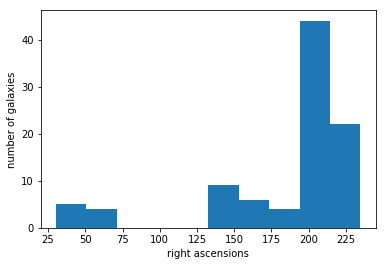

In [20]:
statistics('ra', 10) #calling the function
plt.xlabel("right ascensions") #labeling the x-axis
plt.ylabel("number of galaxies") #labeling the y-axis

6 points total for above:
*     1 point for the function being able to run with no errors
*     1 point for commenting the function well (not perfectly, but well)
*     1 point for the variables in the function being generic
*     1 point for the function returning an array
*     1 point for the arguments being used correctly in the function
*     1 point for the function actually doing the correct thing

### And finally get an array of redshift. Keyword is "z".   
Use your function!  And then comment on the output you see (the first 10 numbers, the min/max, and the histogram.) And for now set the g magnitude limit to 17 like you did for RA and DEC.

<class 'numpy.ndarray'>
The first 10 elements of this array are: [0.07959931 0.05299543 0.05295245 0.03399552 0.02162867 0.07269652
 0.07200021 0.07090618 0.09337822 0.06685437]
The minimum element of this array is 0.02000056
The maximum element of this array is 0.492837
The mean of this array is 0.05633890083654342
Returning the array containing the column...


Text(0,0.5,'number of galaxies')

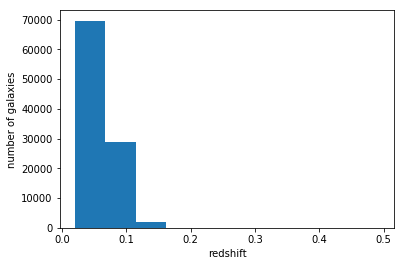

In [21]:
#(17) Use your function
# 1 point for calling the function correctly
statistics('z', 17) #calling out my function after inserting z as myvariable and 17 as mymagnitude
plt.xlabel("redshift") #labeling the x-axis
plt.ylabel("number of galaxies") #labeling the y-axis

#(18) Comment on the output
(1 point for commenting on the output in a thoughtful way (There's not a right answer, but it has to be thoughtful))
* *After plotting the histogram, I have notice that the galaxies are not evenly distributed. More galaxies are distributed from 0.02 to 0.1 than from 0.1 to 0.5. Also, by printing the minimum(0.02000056) and maximum(0.492837) elements, I can now confirm that the redshift of elements within the z array are between 0.02 and 0.5 as indicated in the query.* 

For fun, let's see what the histogram looks like if we go out another factor of 10 in brightness, which is 5 magnitudes, so out to a limiting g-magnitude of 22. Do that now. (Be sure to celebrate how easy this is now that you have your function!)

<class 'numpy.ndarray'>
The first 10 elements of this array are: [0.1409249  0.3066975  0.1199636  0.0590397  0.1073542  0.1213736
 0.1314077  0.13122    0.1158732  0.05893907]
The minimum element of this array is 0.02000056
The maximum element of this array is 0.4999983
The mean of this array is 0.2217759182160271
Returning the array containing the column...


Text(0,0.5,'number of galaxies')

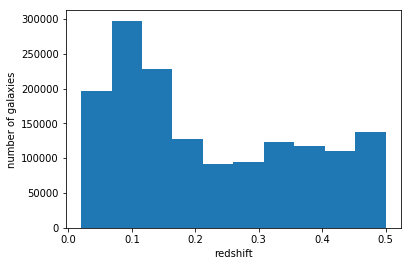

In [22]:
#(19)
statistics('z', 22)
plt.xlabel("redshift") #labeling the x-axis
plt.ylabel("number of galaxies") #labeling the y-axis

5 points total for above:
* 1 point for NOT defining another function
* 1 point for calling the function correctly
* 1 point for creating a histogram
* 1 point for the histogram having reasonable bins
* 1 point for labeling the histogram axes

What can you conclude from this graph?

#(20) 
(1 point for something thoughtful)
* *For a limiting g-magnitude of 22(g<22), the number of galaxies at each redshifts within the range 0.02 to 0.5 in the histogram increases(resulting to a higher number of galaxies at each redshift) compared to that of a limiting g-magnitude of 17(g<17). This is because moving away from 17 towards 22, more galaxies will be visible. Generally this increases the size of the g<22 histogram *

A redshift of 0.5 means that the galaxy is traveling away from us at half the speed of light!

Now repeat the original query with the g<17 criterion because otherwise we're going to get really messed up below.

In [23]:
#(21)
# 1 point for repeating the query without defining another function


# Find objects in the Sloan Digital Sky Survey's Data Release 14.
## 
# First, store the query in an object called "query"
# This query gets declination(dec) from a catalog called SpecPhotoAll (Spectrographic
# and Photometric information) and limits the query to just objects deemed to be galaxies
# with a redshift in between .02 and .5 and with a g-magnitude brighter than 17.
query="""
SELECT z
FROM SpecPhotoAll
WHERE class = 'galaxy' AND z BETWEEN .02 and .5 AND modelMag_g < 17
"""
#Then, query the database. The answer is a table that is being returned to a 
# dataframe that we've named declination.
z = CasJobs.executeQuery(query, "dr14")
z = (np.array(z))[:,0]   #We'll learn more about why you need 
# this statement later. For now
# I'll just tell you we're converting it from a table into an array.
#DR14 means "Data Release 14" See http://skyserver.sdss.org/dr14

print("SQL query finished.")
print("SQL query returned " + str(len(z))+ " galaxies")

SQL query finished.
SQL query returned 100724 galaxies


# Converting redshift to distance
To convert redshift to distance you multiply by the speed of light,c, and divide by Hubble's Constant,H, which measures the rate of expansion of the universe. 

c = 3.0e5 kilometers/second   Please notice that 3.0e5 is Python shorthand for "3 times 10 to the 5th". I'll send your workbook back to you immediately if I see any crazy 3.0\*10**5 in it.

H  = 72.0 km s$^{-1}$Mpc$^{-1}$    Those units are weird.  You can also write it $\frac{km/s}{Mpc}$. The way I say that is "kilometers per second per megaparsec" and I think about it as a velocity (km/s) per distance (Mpc). If a galaxy is 1 Mpc away from us, it will be traveling at a speed of 72.0 km/s away from us. If it's 2 Mpc away from us, it will be traveling at a speed of 144.0 km/s....

In the next cell, please explain what units your answer will be in once you multiply by c and divide by H.  You were trying to convert a redshift to a distance. Do you have units of distance?

#(22)
(1 point)
* *Yes, the distance is measured in Megaparsec(Mpc). z multiplied by c equals the speed an object is away travelling from us. The distance is be calculated by dividing speed with Hubble's constant (H). Speed is measured in km/s and H in (km/s)/Mpc. When divided, both kms/s units in the denominator and numerator cancels, hence the distance will be in Mpc units.*  

Now do the calculation to convert redshift to distance. (You should end up with an array called "distance.")

In [24]:
#(23)
# 1 point
c=3.0e5 #assigning c to 3.0* 10^5
H = 72.0 #assigning H to 72.0
distance =((z*c)/H) #calculating distance
distance

array([ 88.64770833,  88.42616667, 200.40145833, ..., 291.246125  ,
       308.301875  , 340.51670833])

What are the min and max of distance? Express them in both Mpc and Mly (1 Mly = 1 Mega Light year = 1 million light years.)

In [25]:
#(24)
# 1 point for min
# 1 point for max
# 1 Megalight Year = 0.30660139378555 Megaparsec
expressions =["Mpc", "Mly"]
mininMpc = min(distance) #minimum distance in Mpc units
maxinMpc = max(distance)#maximum distance in Mpc units
mininMly = mininMpc/0.30660139378555 ##minimum distance in Mly units
maxinMly = maxinMpc/0.30660139378555 ##maximum distance in Mly units
expressions = [mininMpc, maxinMpc, mininMly, maxinMly] #creating a list for all the units(max and min)

print("The minimum distance in Mpc is", expressions[0], "Mpc.") #priting min in Mpc
print("The maximum distance in Mpc is", expressions[1], "Mpc.") #priting max in Mpc

print("The minimum distance in Mly is", expressions[2], "Mly.")#priting min in Mly
print("The maximum distance i Mly is", expressions[3], "Mly.") #priting max in Mly

The minimum distance in Mpc is 83.33566666666667 Mpc.
The maximum distance in Mpc is 2053.4875 Mpc.
The minimum distance in Mly is 271.8045917461 Mly.
The maximum distance i Mly is 6697.580446866123 Mly.


Do those distances seem reasonable to you? Why?   Our nearest neighbor galaxy is less than a Mpc away, and the edge of the observable universe is about 15,000 Mpc away, so it'd be really weird if you got a galaxy distance that wasn't in between these two extremes. (So if you did, go back and find your mistake.)

#(25)
(1 point for a reasoned answer.  This is a really important skill - being able to tell if your answer is reasonable.)
* *Yes, they seemed resanable because the maximum distance I obtained is 2053.4875Mpc which is less than the edge of the observable universe(15, 000Mpc). *

How many of the distances are close to that lower end? More specifically how many distances are less than 100 Mpc?  First use a loop to find the answer.

In [26]:
#(26)
# 2 points total
# 1 point for using a loop that doesn't produce errors (even if it's the wrong loop)
# 1 point for a loop that counts how many distances are less than 100 Mpc
 #assging distanceless100 to distance values less than 100.
less100distances =0
for element in distance: 
    if element < 100:
        less100distances+=1
print("The total distances within 100 are %d." %less100distances) #printing the total distances


The total distances within 100 are 5387.


In [27]:
less100distances

5387

Calculate what fraction of the distances are within 100 Mpc.  Get your answer to appear nicely as a sentence with a % sign in it.

In [28]:
#(27)
#3 points total
#1 point for calculating the correct fraction
#1 point for having a nice sentence
#1 point for having a % sign in the sentence
totaldistances=np.size(distance)
distancefraction = (less100distances/totaldistances)
print("The fraction of total distances less than 100Mpc, %d, over the total distances, %d, is, %f." %(less100distances, totaldistances, distancefraction ))

The fraction of total distances less than 100Mpc, 5387, over the total distances, 100724, is, 0.053483.


Now do the same thing using np.where. (So no loop.)

In [29]:
#(28)
# 3 points total
# 1 point for having an answer that's not blank
# 1 point for using np.where somehow (even if it's wrong)
# 1 point for using np.where correctly
wheredistances = np.where(distance < 100)#using np where condition for distances less than 100.
npsizeless100 = np.size(wheredistances) #using np size for distances less than 100
npsizetotal =np.size(distance)#using np size of all distances
npfraction = (npsizeless100/npsizetotal)
print("The fraction of total distances less than 100Mpc, %d, over the total distances, %d, is, %f." %(npsizeless100, npsizetotal, npfraction))

The fraction of total distances less than 100Mpc, 5387, over the total distances, 100724, is, 0.053483.


In [30]:
print(npfraction==distancefraction)

True


If you didn't get the same answer using the two methods, figure out what went wrong, and also make a note here about how you fixed it. If you got the same answer using the two methods, make a comment about the usefulness of such a check.

#(29)
2 points total
* 1 point for getting the same answer from the two methods
* 1 point for a comment on what you fixed, or for the usefulness of the check
 
 
* *Confirming the answer using the two different methods help you figure out if you made an error while using any of the methods or if you added variables and figures mistakenly. Specifically this is useful in making sure that the code run successfuly and correctly which is confirmed by getting the same answer after using the two different methods correctly.*

What you've been doing here (besides practicing manipulating arrays) is getting to know the data you've read in. Anytime you read in a bunch of data it's a really good idea to get a sense of what the data look like, and whether it looks reasonable.  In the next lab you'll use these data again for grander purposes.

**Congratulations, that is the end of the Lab!** Make sure you've **run all the code cells, filled in all the text answers and that your plots are all showing without error**.   Then upload your ipynb file to Moodle.